# Importing libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

# Uploading the data

In [3]:
df=pd.read_csv("Data/waterquality.csv")
gdf = gpd.read_file('Data/india-states/Igismap/Indian_States.shp')

In [4]:
df.head(5)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


<AxesSubplot:title={'center':'Missing Values Per Feature'}>

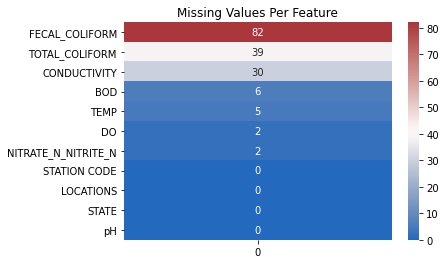

In [5]:
plt.title('Missing Values Per Feature')
nans = df.isna().sum().sort_values(ascending=False).to_frame()
sns.heatmap(nans,annot=True,fmt='d',cmap='vlag')

In [7]:
df_clean = df.loc[df['DO'].notnull() & df['pH'].notnull() & df['CONDUCTIVITY'].notnull() & df['BOD'].notnull()& df['NITRATE_N_NITRITE_N'].notnull() & df['FECAL_COLIFORM'].notnull() & df['TOTAL_COLIFORM'].notnull() ]

In [8]:
df_clean.head(5)

,STATION CODE,LOCATIONS,STATE,TEMP,DO,pH,CONDUCTIVITY,BOD,NITRATE_N_NITRITE_N,FECAL_COLIFORM,TOTAL_COLIFORM
0,1312,"GODAVARI AT JAYAKWADI DAM, AURNAGABAD,MAHARASHTRA",MAHARASHTRA,29.2,6.4,8.1,735.0,3.4,2.00,3.0,73.0
1,2177,GODAVARI RIVER NEAR SOMESHWAR TEMPLE.,MAHARASHTRA,24.5,6.0,8.0,270.0,3.1,2.00,72.0,182.0
2,2182,GODAVARI RIVER AT SAIKHEDA.,MAHARASHTRA,25.8,5.5,7.8,355.0,4.2,9.00,59.0,133.0
3,2179,"GODAVARI RIVER AT HANUMAN GHAT, NASHIK CITY.",MAHARASHTRA,24.8,5.5,7.8,371.0,5.6,3.55,90.0,283.0
4,2183,GODAVARI RIVER AT NANDUR- MADMESHWAR DAM.,MAHARASHTRA,25.7,5.7,7.9,294.0,3.2,2.69,45.0,132.0


In [25]:
import pandas as pd



            Paramètres      Si  V_ideal
0                   DO    10.0     14.6
1                   PH     8.5      7.0
2         CONDUCTIVITY  1000.0      0.0
3                  BOD     5.0      0.0
4  NITRATE_N_NITRITE_N    45.0      0.0
5       FECAL_COLIFORM   100.0      0.0
6       TOTAL_COLIFORM  1000.0      0.0


k : constante de proportionnalité et peut également être calculée à l'aide de
l'équation suivante:
k =1/∑ (1/Si)

In [26]:
Somme_Si=0.0
for i in Permissible_limits['Si']:
    Somme_Si+=1/i
    
k=1/Somme_Si 

2.213029391344596


 Dans cette approche,
une valeur numérique appelée poids relatif (Wi), spécifique à chaque
paramètre physico-chimique, est calculée (Tab.1) selon la formule suivante :
Wi =k/Si

In [32]:
#Parameter_unit_weights
Wi=list()
for i in Permissible_limits['Si']:
    Wi.append(round(k/i,4))

In [35]:
Permissible_limits['Parameter_unit_weights']=Wi
Permissible_limits

,Paramètres,Si,V_ideal,Parameter_unit_weights
0,DO,10.0,14.6,0.2213
1,PH,8.5,7.0,0.2604
2,CONDUCTIVITY,1000.0,0.0,0.0022
3,BOD,5.0,0.0,0.4426
4,NITRATE_N_NITRITE_N,45.0,0.0,0.0492
5,FECAL_COLIFORM,100.0,0.0,0.0221
6,TOTAL_COLIFORM,1000.0,0.0,0.0022


qi = 100 ×(Vi − VIdeal)/(Si − VIdeal)
où :Vi est la valeur mesurée du paramètre i dans le test
échantillonnesVIdeal est la valeur idéale du paramètre i en pur
eau (0 pour tous les paramètres sauf DO = 14:6 mg/l et
pH = 7:0), et Si est la valeur standard recommandée de
paramètre i

In [37]:
df=df_clean
start=0
end=447
station=df.iloc [start:end ,0]
location=df.iloc [start:end ,1]
state=df.iloc [start:end ,2]
do= df.iloc [start:end ,4].astype(np.float64)
value=0
ph = df.iloc[ start:end,5]  
co = df.iloc [start:end ,6].astype(np.float64)
bod = df.iloc [start:end ,7].astype(np.float64)
na= df.iloc [start:end ,8].astype(np.float64)
fc=df.iloc [start:end ,9].astype(np.float64)

In [38]:
qna=na.apply(lambda x:100*x/45)

In [39]:
qna

0       4.444444
1       4.444444
2      20.000000
3       7.888889
4       5.977778
         ...    
529     2.222222
530     6.666667
531     6.666667
532     4.444444
533     2.222222
Name: NITRATE_N_NITRITE_N, Length: 447, dtype: float64

In [ ]:
df['wph']=df.npH * 0.2604
df['wdo']=df.ndo * 0.2213
df['wbdo']=df.nbdo * 0.4426
df['wec']=df.nec* 0.0221
df['wna']=df.nna * 0.0492
df['wco']=df.nco * 0.0022
df['wqi']=df.wph+df.wdo+df.wbdo+df.wec+df.wna+df.wco 
df

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Charger les données
data = pd.read_csv('votre_fichier.csv')

# Prétraitement des données
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,:], data_scaled[train_size:len(data_scaled),:]

# Créer des séries temporelles de longueur définie (time_steps)
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 12
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

# Reshape des données d'entrée pour la modélisation en réseau LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(1, time_steps)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Faire des prévisions sur l'ensemble de test
testPredict = model.predict(X_test)
testPredict = scaler.inverse_transform(testPredict)

# Faire des prévisions pour les années futures
last_inputs = data_scaled[-time_steps:, 0]
last_inputs = np.reshape(last_inputs, (1, 1, time_steps))
futurePredict = model.predict(last_inputs)
futurePredict = scaler.inverse_transform(futurePredict)

# Imprimer les résultats
print("Prévisions pour les années futures:")
print(futurePredict)


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Importer les données historiques
data = pd.read_csv('time_series.csv', parse_dates=['Date'], index_col='Date')

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Définir la taille de la fenêtre temporelle
window_size = 12

# Préparer les ensembles d'entraînement et de test
train_size = int(len(data) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size-window_size:len(data), :]

# Diviser les données en entrées et sorties
def create_dataset(dataset, window_size):
    X, y = [], []
    for i in range(len(dataset)-window_size-1):
        X.append(dataset[i:(i+window_size), 0])
        y.append(dataset[i + window_size, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Créer le modèle LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Prédire les valeurs futures
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Visualiser les prévisions
import matplotlib.pyplot as plt

plt.plot(data.index[train_size:], data[train_size:])
plt.plot(data.index[train_size:], predictions)
plt.show()
